# Descriptive Analysis in Python

---

Today we are going to use the NYC Vehicle Collisions 'accidents.csv' dataset from:
https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

Remember, in order to upload a csv to Goolge Colab, you can first download it to you own machine with the following code: 

1. `!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv`
2. **In Colab, click on the little arrow on the left-hand side of the screen,**

<div> 
    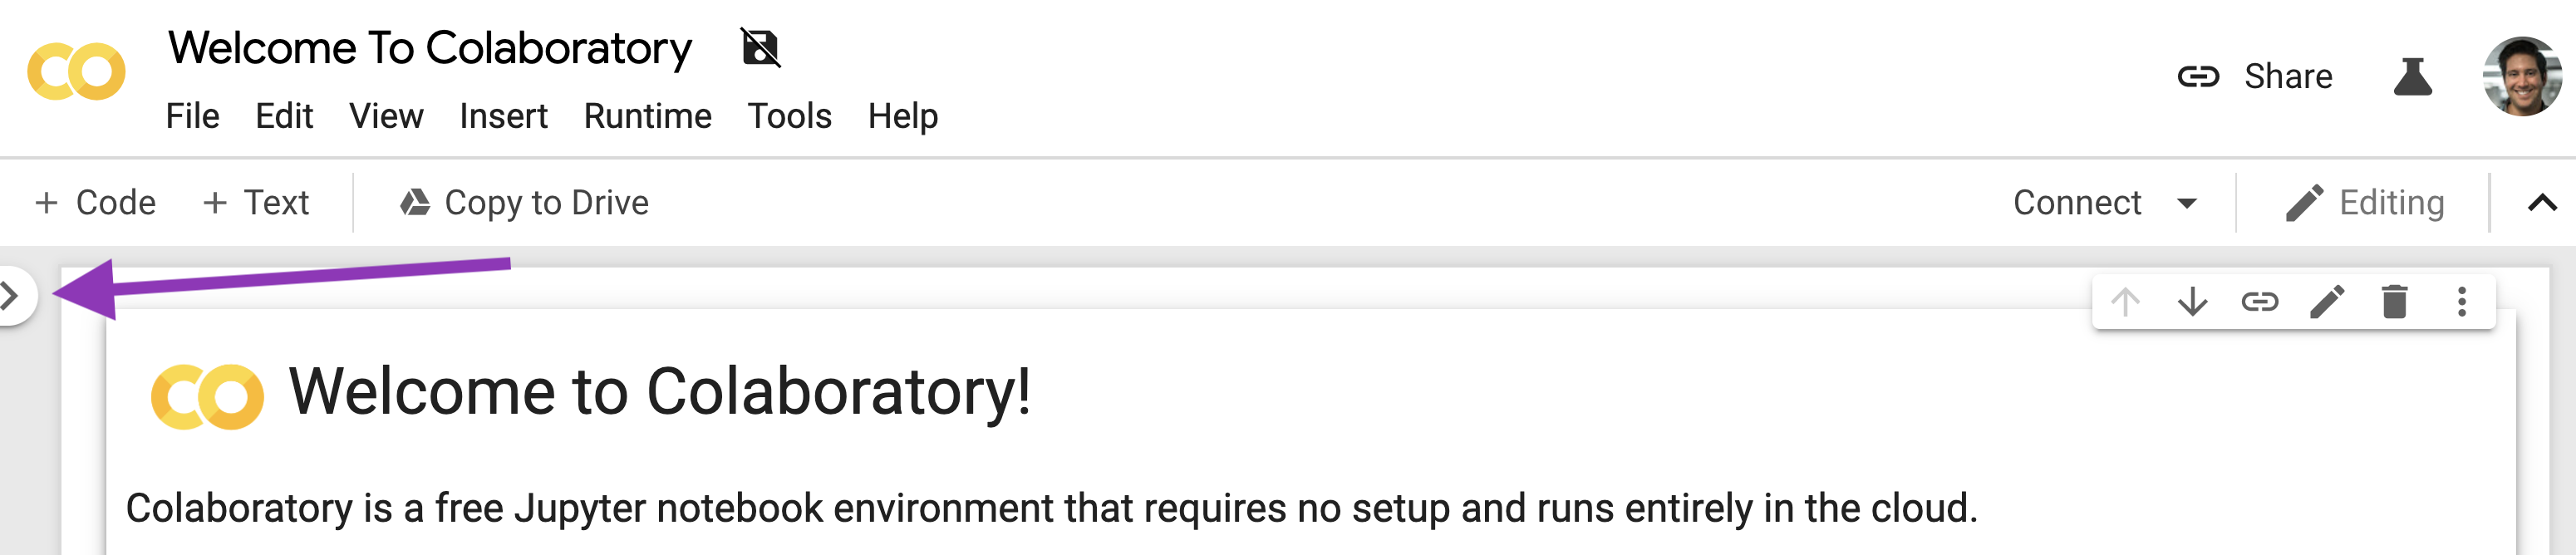
</div>

3. **Click on "Files" and then "Upload" to upload the .csv file,**

<div>
    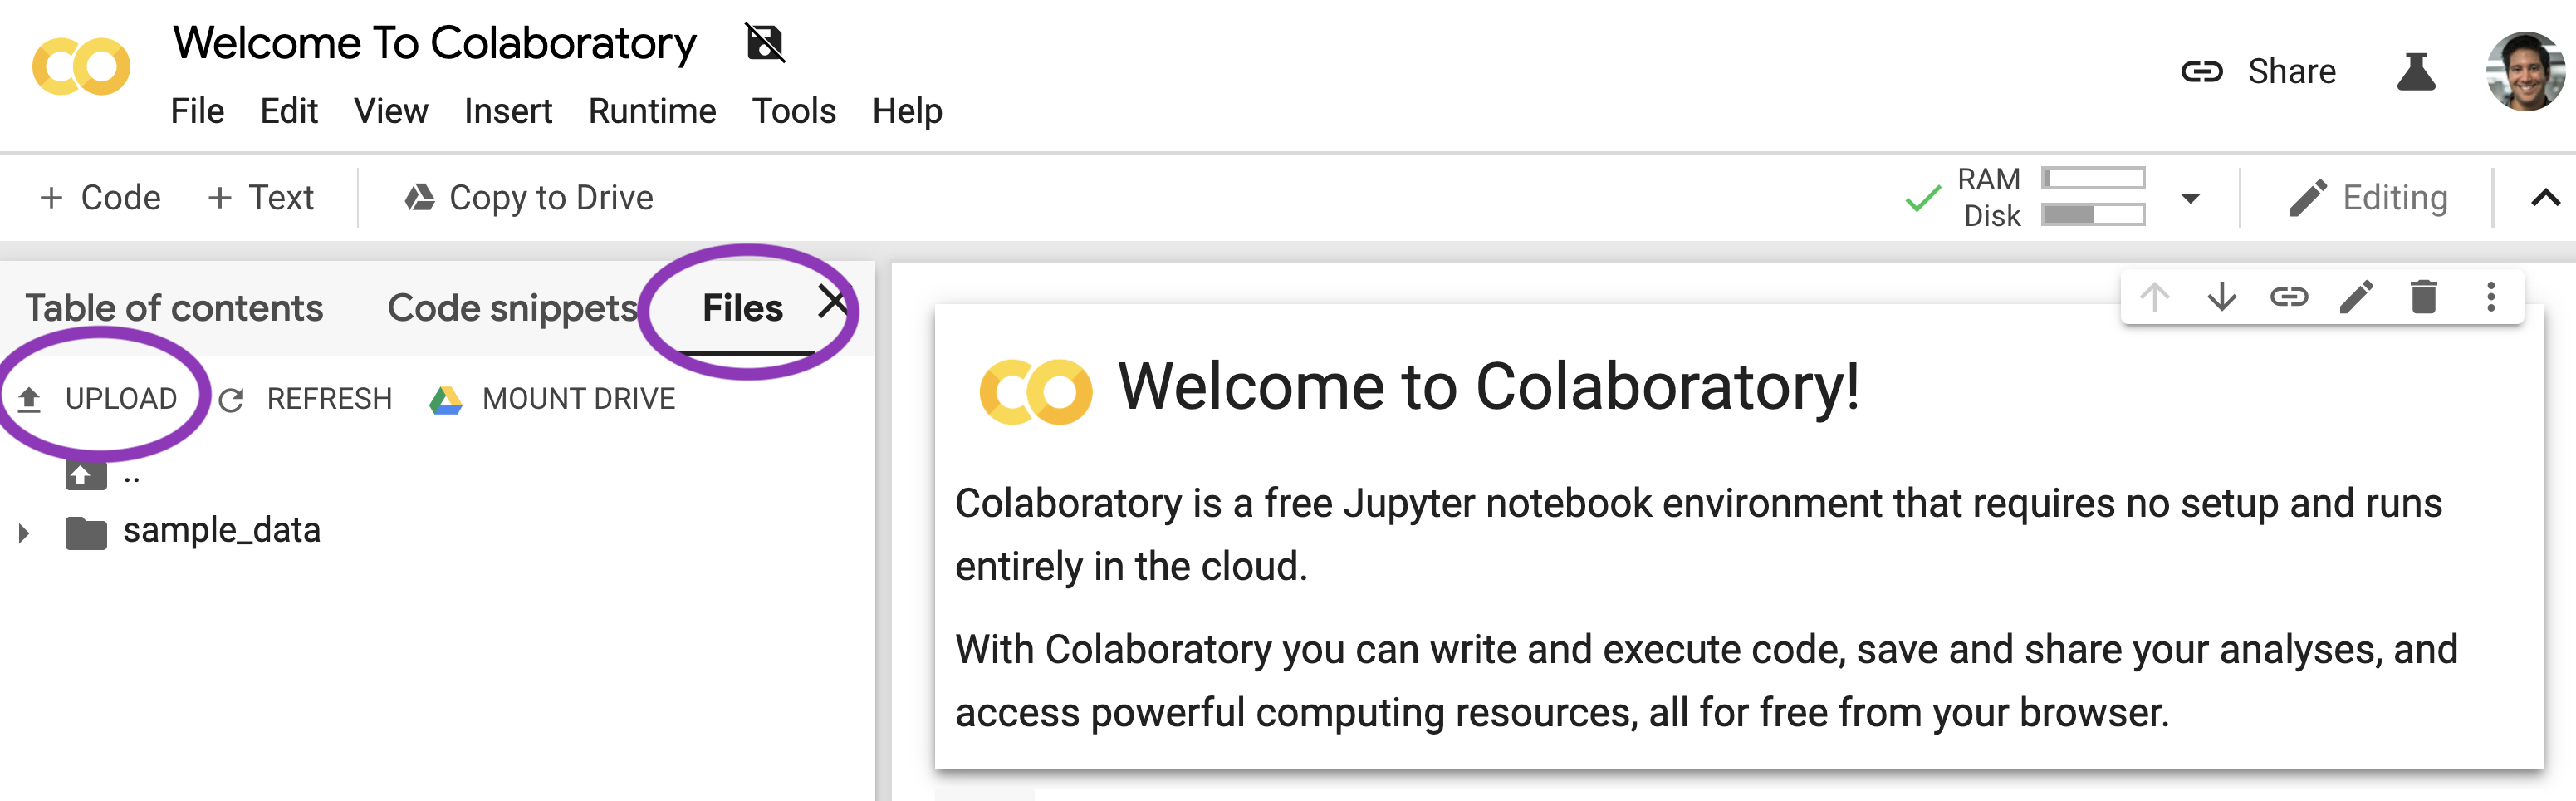 
    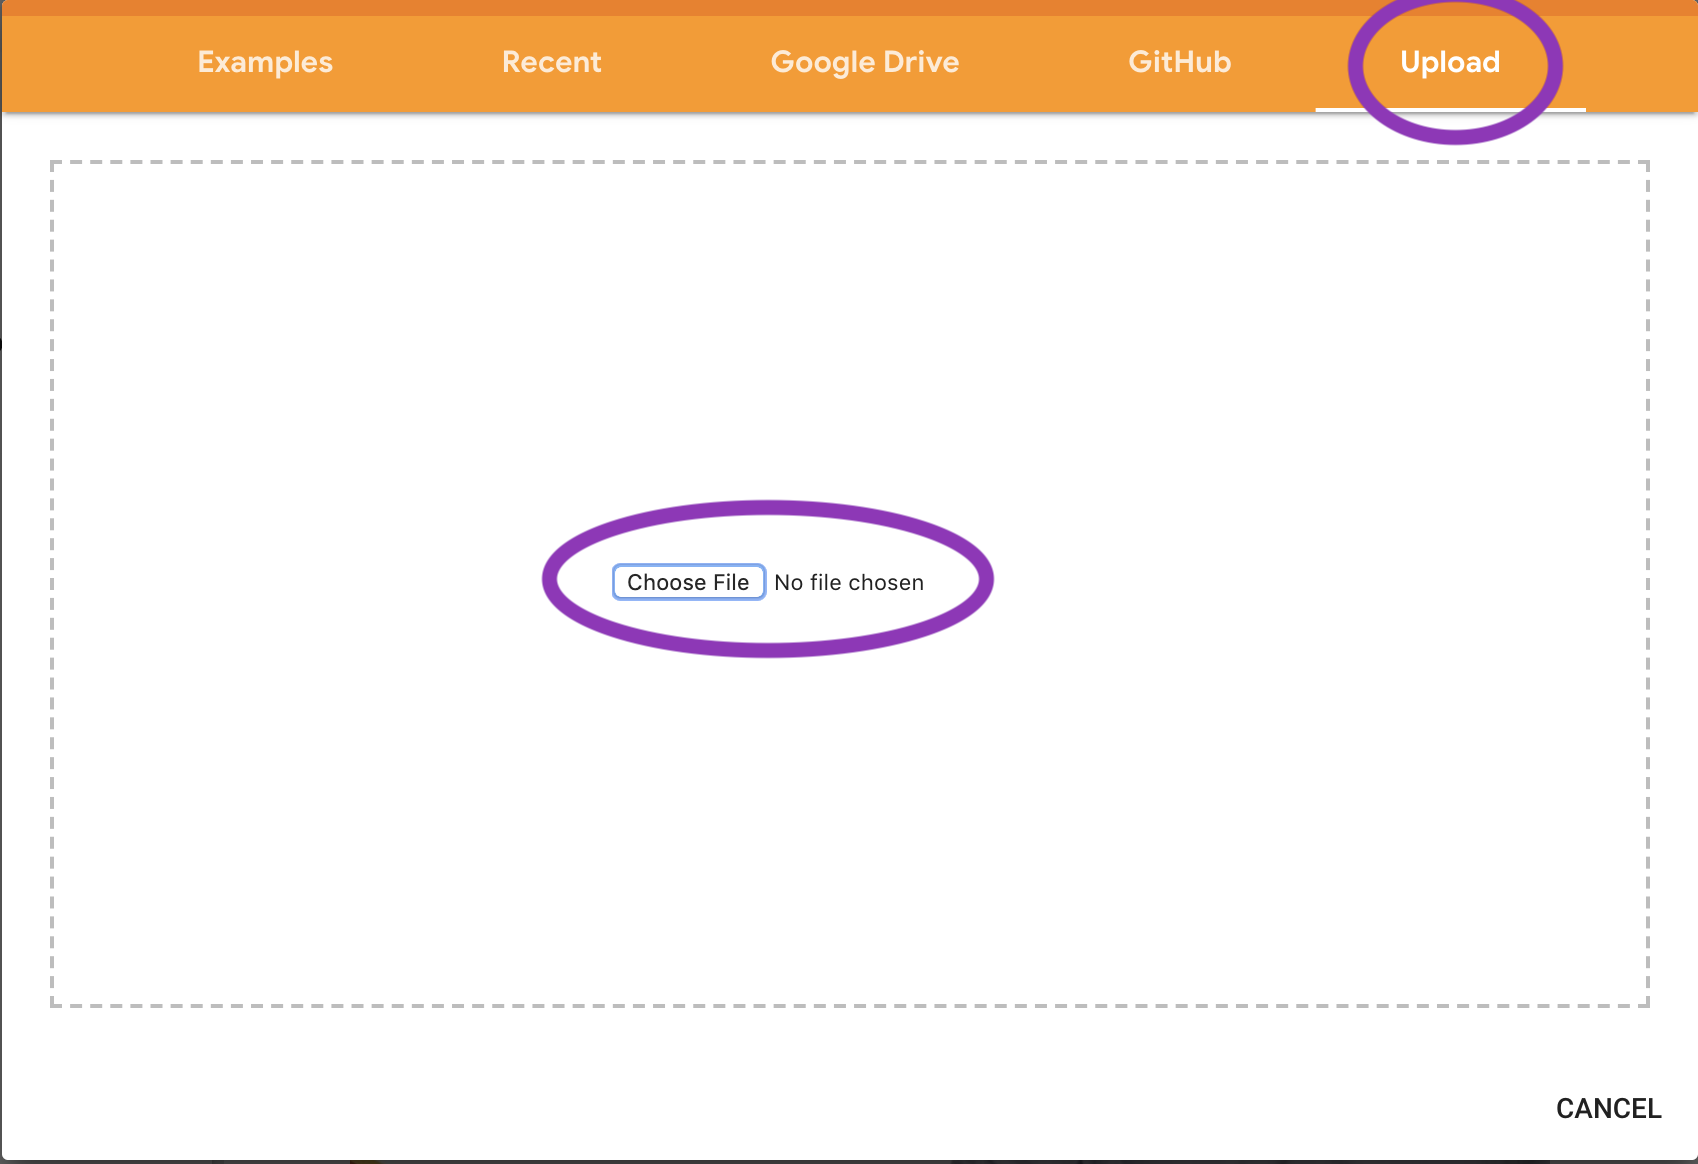
</div>

4. **Select ".csv" and click "open".**

Now that we have our CSV uploaded into our Colab environment, we can 'read it in' using `pd.read_csv`

---

In [ ]:
import pandas as pd

df = pd.read_csv("./accidents.csv",low_memory=False)

# low_memory means we want to read in our full data set 

%matplotlib inline

In [ ]:
pd.options.display.max_columns = 100

# Data Types

Remember, Python is an object oriented programming language, meaning we can do different things to different objects. But how Python perceives our data (as a string, an integer, a float, a Boolean, a datetime value, et. cetera) deterimnes what we can do with our data. 

For instance, I can't take the average of a list of strings. So, let's use `df.dtypes` to see how Python is interpreting our data.

In [ ]:
df.dtypes

It looks like our date and time columns are being read in as strings, not as datetimes, so let's adjust:

In [ ]:
df['DATETIME'] = df['DATE'] + ' ' + df['TIME'] # let's create a new column called DATETIME...
df.DATETIME = pd.to_datetime(df.DATETIME, format="%m/%d/%Y %H:%M") # ...and convert it to datetime format

In [ ]:
df.head()

We can also convert our original 'DATE' and 'TIME' columns to datetime format:

In [ ]:
df['TIME'] = pd.to_datetime(df.TIME, format="%H:%M")

In [ ]:
df['DATE'] = pd.to_datetime(df.DATE, format="%m/%d/%Y")

# Engineering New Columns

Now, let's create a new column called "INJURY" and another called "DEATH" that only holds a True value if there was at least one injury or death in the incident:

In [ ]:
df['INJURY'] = (df['NUMBER OF PERSONS INJURED']>0)
df['DEATH'] = (df['NUMBER OF PERSONS KILLED']>0)

In [ ]:
df.head()

---

# Exercise 1: What is the most common contributing factor to collisions?

In [ ]:
# your code here

# Solution

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:10].plot(kind='barh')

# Exercise 2: Break down the number of collisions by borough

In [ ]:
# your code here

# Solution

In [ ]:
df['BOROUGH'].value_counts().plot(kind='barh')

---

# Basic Data Viz / Plotting

In [ ]:
df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE')

Immediately we see there are some erronenous values here. I don't think there were any accidents in NYC at longitude 0, latitude 40 (especially because that is somewhere in Spain, according to Google). 

So let's use what's known as a 'Mask' – a selection condition that only keeps the entries we determine to be valid.

Another quick Google search tells us that the lat/long for NYC is between 40/41 and -72/-74.5, so let's use that.

In [ ]:
clean_mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)

cleandf = df[clean_mask]

In [ ]:
cleandf.plot(kind='scatter', x='LONGITUDE', y='LATITUDE')

Much better. Let's increase the figuresize a bit, too, just for ease of viewing. 

In [ ]:
cleandf.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15)) # increasing the figsize a bit

# Overplotting

Although cool, this isn't exactly helpful, because there are just so many datapoints. This is known as "Overplotting."

To get around overplotting, we can sample our data by either specifying the number of points we want to keep, or the percentage of our data set that we want to keep.

## `sample(n= ...)` 

let's us keep a specified number of data points to plot

In [ ]:
sample = cleandf.sample(n=10000) # keep 10,000 data points

sample.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15))

## `sample(frac= ...)` 

let's us keep a specified percentage (fraction) of data points to plot

In [ ]:
sample = cleandf.sample(frac=0.01) # keep 1% of the dataset

sample.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15))

## `s`

let's us change the marker size

In [ ]:
cleandf.plot(
    kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15), s=0.5 ) # changing the marker size ('s')

## `alpha`

let's us change the transparency of the marker

In [ ]:
cleandf.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.05) # changing the marker transparency ('alpha')

---

# Datetimes 

Now, back to working with datetimes, in particular, time series data (data that is obtained at successive times, often with equal intervals between them).

Pandas has proven very successful as a tool for working with time series data, especially in the financial data analysis space. Using the [NumPy](http://www.numpy.org/) `datetime64` and `timedelta64` dtypes, pandas consolidated a large number of features from other Python libraries as well as created a tremendous amount of new functionality for manipulating time series data.

To illustrate, let's generate a list of datetime values for 3 neighboring days starting from `01/30/2017` with the interval equals to one hour. 

The [`date_range`](http://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.date_range.html) function can return such list in [`DatetimeIndex`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html) format. 

We simply should define the left bound for generating dates `start` (`"01/30/2017"` in our case), the right bound for generating dates `end` or the amount of intervals `periods` (`3*24` in our case, because we are going to cover three days) and preferable frequency `freq` (`'H'` in our case)

In [ ]:
example_range = pd.date_range(start='01/30/2017', periods=3*24, freq='H')

print("Number of elements:", len(example_range.values))
example_range[:10]

## `pd.to_datetime`

To convert a `Series` or list-like object of date-like objects e.g. strings, epochs, or a mixture, you can use the [`to_datetime`](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.to_datetime.html) function. When passed a `Series`, this returns a Series (with the same index), while a list-like is converted to a `DatetimeIndex`:

In [ ]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-12-10', None])) 

---

# New Data!

To better illustrate working with datetimes, let's look at the [Daily minimum temperatures in Melbourne data set from Kaggle](https://www.kaggle.com/paulbrabban/daily-minimum-temperatures-in-melbourne) 

You can download this dataset using the "Download" section. 

In [ ]:
melbourne_temp = pd.read_csv("./daily-minimum-temperatures-in-melbourne.csv", 
                             skiprows=1,  # let's us skip the header
                             names=["date", "temp"])  # let's name columns as we desire
melbourne_temp

Let's drop that final row (the one that appears to just be a description of the data set).

In [ ]:
melbourne_temp.drop(melbourne_temp.tail(1).index,inplace=True) 

melbourne_temp.tail()

In [ ]:
melbourne_temp.dtypes

## `to_numeric` 

Along with converting our 'date' column to a datetime dtype, we can also use `pd.to_numeric` to convert the temperatures in our data set to a numeric type. 

In [ ]:
melbourne_temp['temp'] = melbourne_temp['temp'].apply(pd.to_numeric, errors="coerce")
melbourne_temp['date'] = pd.to_datetime(melbourne_temp['date'])

In [ ]:
melbourne_temp.dtypes

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (16, 6) # change figsize 

melbourne_temp.set_index('date', inplace=True)

In [ ]:
melbourne_temp.plot()
plt.show()

---

# Exercise 1: Find the minimum temperture for all of the recorded history included in this data set:

In [ ]:
# your code here

# Solution

In [ ]:
melbourne_temp.min()

# Exercise 2: Find the temperature for every day in January, 1981:

In [ ]:
# your code here

# Solution

In [ ]:
melbourne_temp['1981-01']

# Exercise 3: Find the temperature for every day between Jan. 5, 1990 and Jan. 12, 1990:

In [ ]:
# your code here

# Solution

In [ ]:
melbourne_temp['1990-01-05':'1990-01-12']

# Exercise 4: Plot the temperature for every day in February, 1981:

In [ ]:
# your code here

# Solution

In [ ]:
melbourne_temp['1981-02'].plot()
plt.show()

# Exercise 5: Find the average temperature in February, 1981:

In [ ]:
# your code here

# Solution

In [ ]:
melbourne_temp['1981-02'].mean()

# Exercise 6: Find how many days the temperature was less than 2 degress across the whole data set:

In [ ]:
# your code here

# Solution

In [ ]:
print("Days with temperature less than 2 degrees:", (melbourne_temp < 2).sum().values[0])

---

# Resampling

Resampling involves changing the frequency of your time series observations. 

- Upsampling means you increase the frequency of the samples (say, from minutes to seconds)
- Downsampling means you decrease the frequency of the samples (say, from months to days)

Imagine we are trying to determine the average weekly temperture from our Melbourne set, for instance. In that case, we would need to upsample the information from daily to weekly. 

In [ ]:
melbourne_temp.resample('W').mean().head(10)

In [ ]:
melbourne_temp.resample('A').min() # 'A' means year-end frequency

Resampling is also a fast way to smooth in some essence the time series. For instance, the time series of monthly averages has much less peaks or outliers and allows tracking the periodicity. 

One way to smooth a time series is to calculate a rolling average – the average value of the current point and `N` previous points. It can be calcualted using [`rolling`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) pandas's method.

In [ ]:
ax = melbourne_temp.plot(alpha=0.25) # draw initial time series and make it transparent

melbourne_temp.resample('M').mean().plot(ax=ax) # draw montly average values

melbourne_temp.rolling(25).mean().plot(ax=ax) # draw roling average that takes into account 25 points

ax.legend(["daily data", "montly average", "roling mean"])
plt.show()

If you set the hourly frequency in the [`resample()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.resample.html) function, then `NaN` values will be created, because there are no more tiny distribution of the temperature.

This is upsampling.

In [ ]:
upsampled = melbourne_temp.resample('H').mean()
upsampled.head(30)

But we can interpolate the missing values at this new frequency.

The `Series` pandas's object provides the [`interpolate`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.interpolate.html) function to interpolate missing values. A good starting point is to use a `linear interpolation`. This draws a straight line between available data and fills in values at the chosen frequency from this line.

In [ ]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)